# OCR & Deep Learning

- **Credit**: [nanonets](https://nanonets.com/) & [mindee](https://mindee.com/)
- **Notebook Author**: [Pierre GUILLOU](https://www.linkedin.com/in/pierreguillou/)
- **Date**: 01/10/2021
- **Blog post**: NLP nas empresas | Reconhecimento de textos com Deep Learning em PDFs e imagens

Todas as empresas têm uma coisa em comum: usam e produzem muitos documentos em formatos como PDF ou imagem que dificultam sua análise por modelos de NLP de tipo NER (Named Entity Recognition), por exemplo. Felizmente, as ferramentas de OCR (Optical character recognition) progrediram enormemente, em particular desde 2018 com o uso de modelos de Deep Learning para a detecção e reconhecimento de textos. 

Se [Tesseract](https://github.com/tesseract-ocr/tesseract) é a ferramenta Open Source mais conhecida, e existem outras ferramentas como o [DocTR](https://github.com/mindee/doctr) que também merecem ser testadas quanto à sua facilidade de uso e eficiência graças ao Deep Leanring.

In [1]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Tesseract

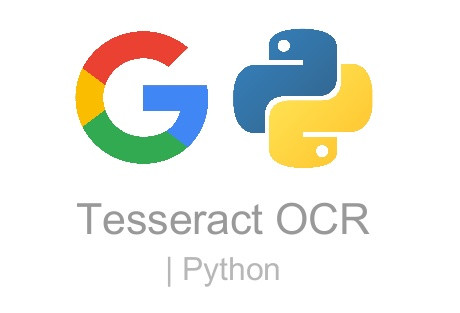

[Tesseract](https://github.com/tesseract-ocr/tesseract) is an optical character recognition engine for various operating systems. It is free software, released under the Apache License. Originally developed by Hewlett-Packard as proprietary software in the 1980s, it was released as open source in 2005 and development has been [sponsored by Google since 2006](http://googlecode.blogspot.com/2006/08/announcing-tesseract-ocr.html). 

Version 4 adds [LSTM](https://en.wikipedia.org/wiki/Long_short-term_memory) based OCR engine and models for many additional languages and scripts, bringing the total to 116 languages.

**Note**: we will use parts of the post [A comprehensive guide to OCR with Tesseract, OpenCV and Python](https://nanonets.com/blog/ocr-with-tesseract/) in this notebook.

### Installation

#### PyTesseract 

Check your Ubuntu version.

In [2]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


For `Ubuntu 18.04` users, Tesseract 4 is part of the main `apt-get` repository. Thanks to that, it is easy to install Tesseract via command `sudo apt install tesseract-ocr`. 

After that, we should install the lang package corresponding to the language of our text (if not English). I will leave in comments the commands to run but it is far more easy to run just one command `sudo apt-get install tesseract-ocr-LANG` replacing LANG by the 3 letters of the lang package. For example, for Portuguese, run the command `sudo apt-get install tesseract-ocr-por` (check the [Tesseract languages list](https://github.com/tesseract-ocr/tessdoc/blob/main/Data-Files-in-different-versions.md) and the corresponding files [here](https://github.com/tesseract-ocr/tessdata) if you want to install them manually).

At last, install PyTesseract (the python wrapper for Tesseract) with the command `pip install pytesseract`.

In [3]:
%%capture
!sudo apt update

# tesseract-ocr
# !sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-por

# pytesseract
!pip install pytesseract

In [4]:
# Verify your Tesserac version
# As long as you see tesseract 4 somewhere in the output,
# you know that you have the latest version of Tesseract installed on your system.
!tesseract -v

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


In [5]:
# check lang packages
!tesseract --list-langs

List of available languages (3):
por
eng
osd


#### (Option) Lang

If you installed Tesseract via the command `sudo apt install tesseract-ocr`, we need to install manually a lang package. 

Check the languages supported by Tesseract [here](https://github.com/tesseract-ocr/tessdoc/blob/main/Data-Files-in-different-versions.md).

Then, find the url of the language you want to use within Tesseract [here](https://github.com/tesseract-ocr/tessdata).

For example, if you want to use Portuguese, use this link https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata to download the lang package inside the `tessdata` folder.

In [6]:
# tessdatadir = '/usr/share/tesseract-ocr/4.00/tessdata'
# %cd {tessdatadir}

# # %%capture
# !wget https://github.com/tesseract-ocr/tessdata/raw/4.00/por.traineddata
# %cd /content

# # chack lang
# !tesseract --list-langs

#### OpenCV

Now that we have the PyTesseract, we now need to install OpenCV.

In [7]:
%%capture
# Install following libraries if necessary 

# Pillow
# Pillow is the friendly PIL (Python Imaging Library). 
# PIL adds image processing capabilities to your Python interpreter.
# !pip install pillow

# imutils
# https://github.com/PyImageSearch/imutils
# A series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, 
# and displaying Matplotlib images easier with OpenCV and both Python 2.7 and Python 3.
# !pip install imutils

# OpenCV
# OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. 
!sudo apt update
!sudo apt install python3-opencv

In [8]:
import cv2
print(cv2.__version__)

4.1.2


In [9]:
# In Colab, use cv2_imshow instead of cv2.imshow
from google.colab.patches import cv2_imshow

### OCR with Pytesseract and OpenCV

In [15]:
import cv2
import pytesseract
import numpy as np

# path to image
# source: https://portal.fiocruz.br/coronavirus/material-para-download
path_to_data = "/content/drive/MyDrive/Colab Notebooks/PDF_with_DL/data/"
doc_name = "atencao_com_as_mascaras_de_tecido_2_0_0.jpg"
path_to_doc = path_to_data + doc_name

# get OpenCV image
img = cv2.imread(path_to_doc)

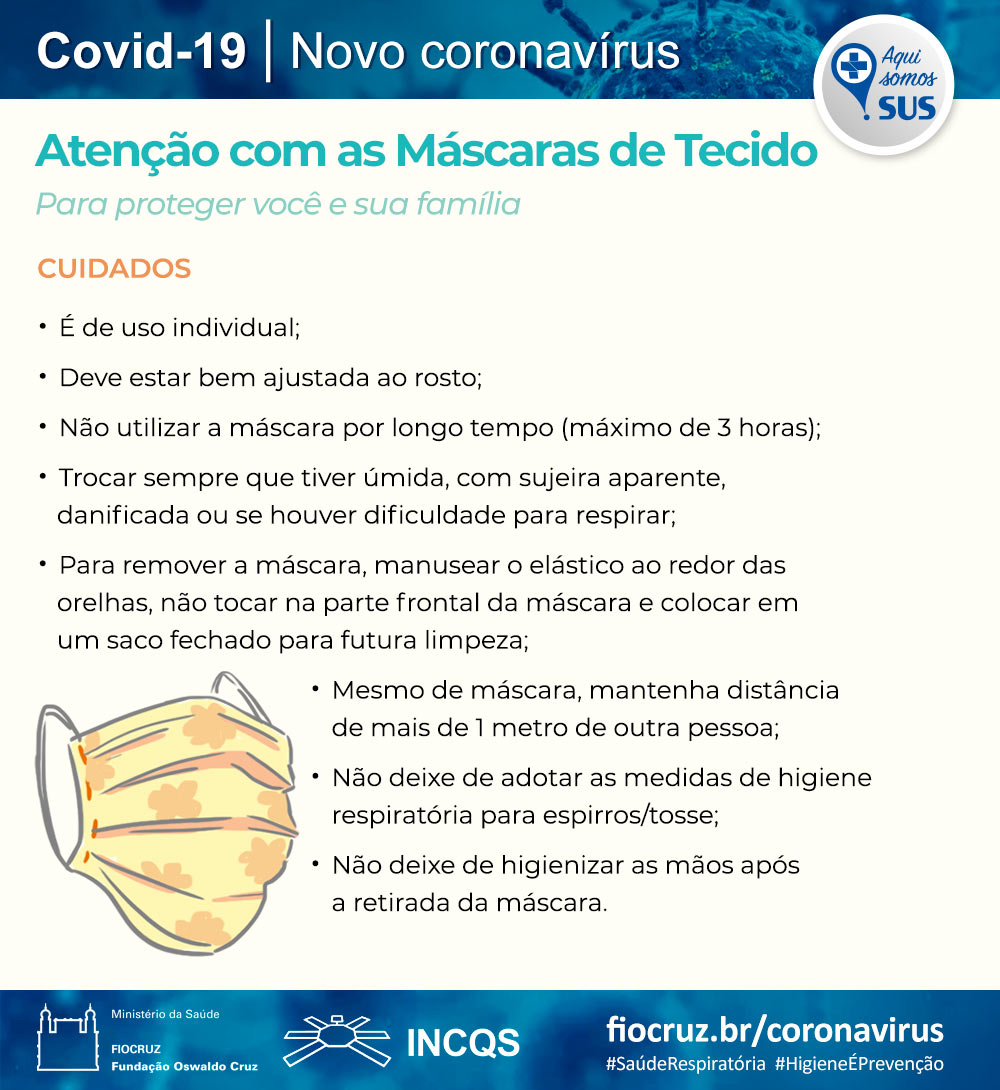

In [16]:
# Display image
cv2_imshow(img)

In [17]:
# Get text
text = pytesseract.image_to_string(img, lang='por')
print(text)

   

Covid-19 | Novo coronavirus aqu

HOMO

| sus
Atenção com as Máscaras de Tecido -

E a ( VC UC q

CUIDADOS

* É de uso individual;
* Deve estar bem ajustada ao rosto;
* Não utilizar a máscara por longo tempo (máximo de 3 horas);

* Trocar sempre que tiver úmida, com sujeira aparente,
danificada ou se houver dificuldade para respirar;

* Para remover a máscara, manusear o elástico ao redor das
orelhas, não tocar na parte frontal da máscara e colocar em
um saco fechado para futura limpeza;

* Mesmo de máscara, mantenha distância
de mais de 1 metro de outra pessoa;

  
 

>) * Não deixe de adotar as medidas de higiene
respiratória para espirros/tosse;

* Não deixe de higienizar as mãos após
a retirada da máscara.

Minis

o. E INCQS Efe Te gro geo go Ta NIIATES

 

[REAR VE or HSaúdeRespiratória &HigieneÉPrevenção



### Preprocessing for Tesseract

To avoid all the ways your tesseract output accuracy can drop, you need to make sure the image is appropriately pre-processed.

This includes rescaling, binarization, noise removal, deskewing, etc.

To preprocess image for OCR, use any of the following python functions or follow the OpenCV documentation.

In [18]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [19]:
# get OpenCV image
img = cv2.imread(path_to_doc)

gray = get_grayscale(img)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

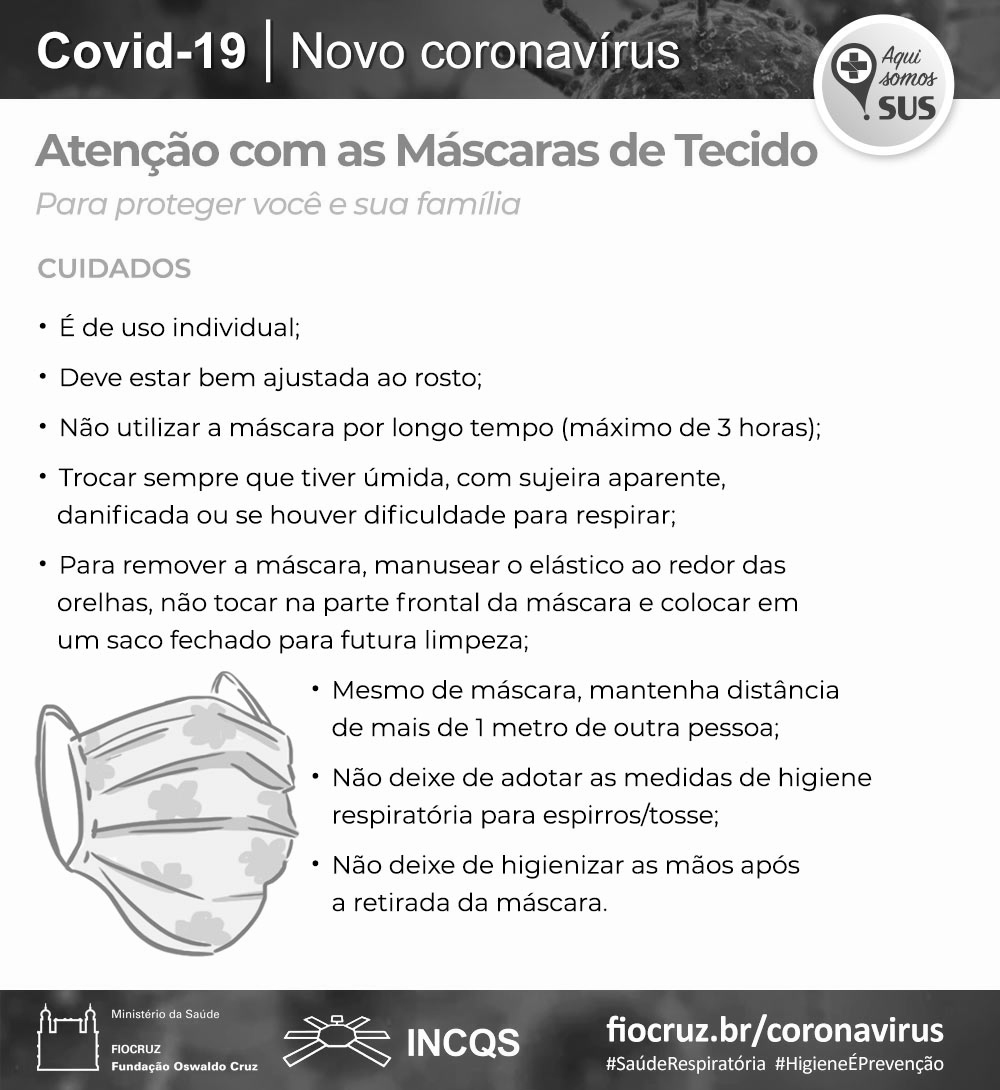

In [20]:
cv2_imshow(gray)

In [21]:
# Get text
text = pytesseract.image_to_string(gray, lang='por')
print(text)

   

Covid-19 | Novo coronavirus am,

[sus
Atenção com as Máscaras de Tecido

* É de uso individual;
* Deve estar bem ajustada ao rosto;
* Não utilizar a máscara por longo tempo (máximo de 3 horas);

* Trocar sempre que tiver úmida, com sujeira aparente,
danificada ou se houver dificuldade para respirar;

* Para remover a máscara, manusear o elástico ao redor das
orelhas, não tocar na parte frontal da máscara e colocar em
um saco fechado para futura limpeza;

5" SN
a Ss * Não deixe de adotar as medidas de higiene
aa Ens respiratória para espirros/tosse;

e 1 E Não deixe de higienizar as mãos após
7 a retirada da máscara.

DOE G EE

 
  

* Mesmo de máscara, mantenha distância
de mais de 1 metro de outra pessoa;

      
 

mocitl Zea INCQS Lift gTr A So go ENTAO

 

[E CEA HSaúdeRespiratória HHigieneÉPrevenção



### Getting boxes around text

Using Pytesseract, you can get the bounding box information for your OCR results using the following code.

The script below will give you bounding box information for each character detected by tesseract during OCR.

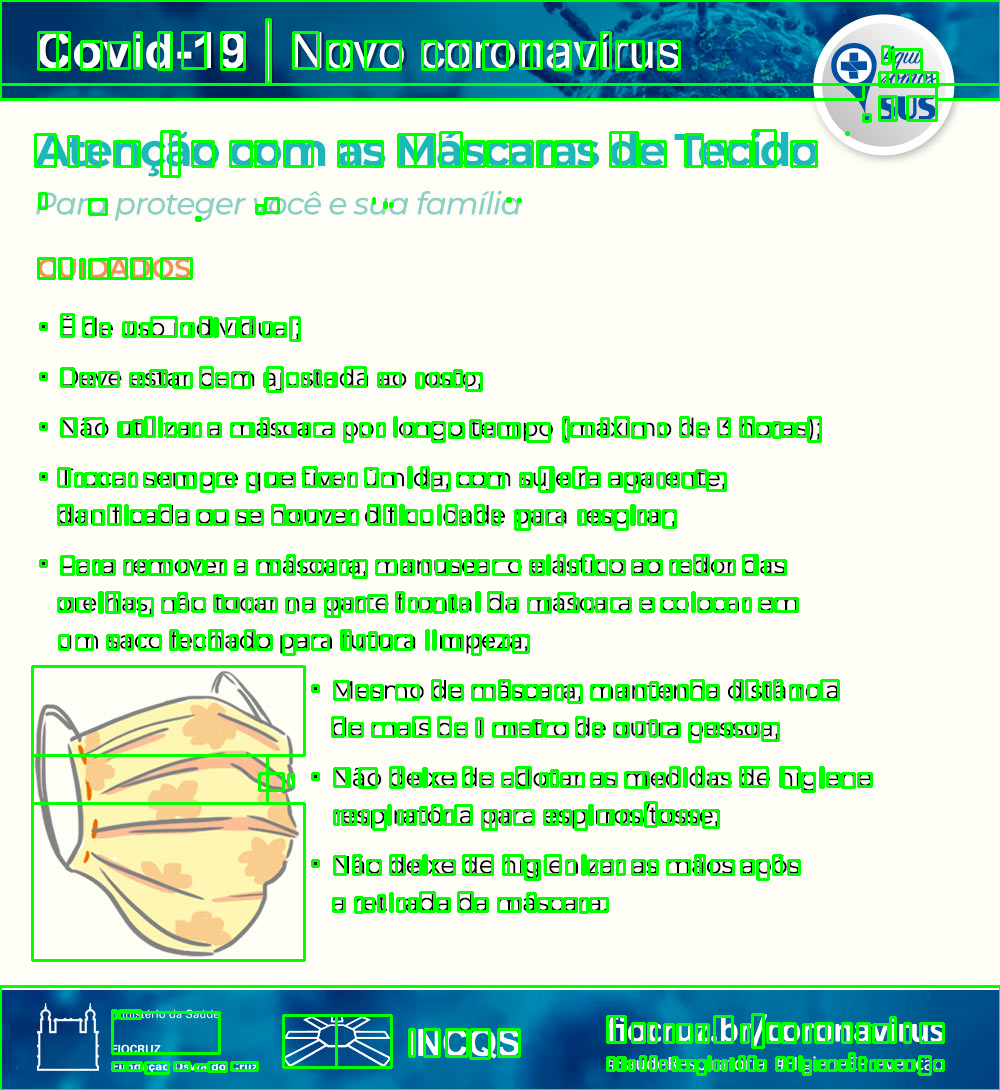

-1

In [22]:
# get OpenCV image
img = cv2.imread(path_to_doc)

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

In [23]:
from pytesseract import Output

# get OpenCV image
img = cv2.imread(path_to_doc)

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


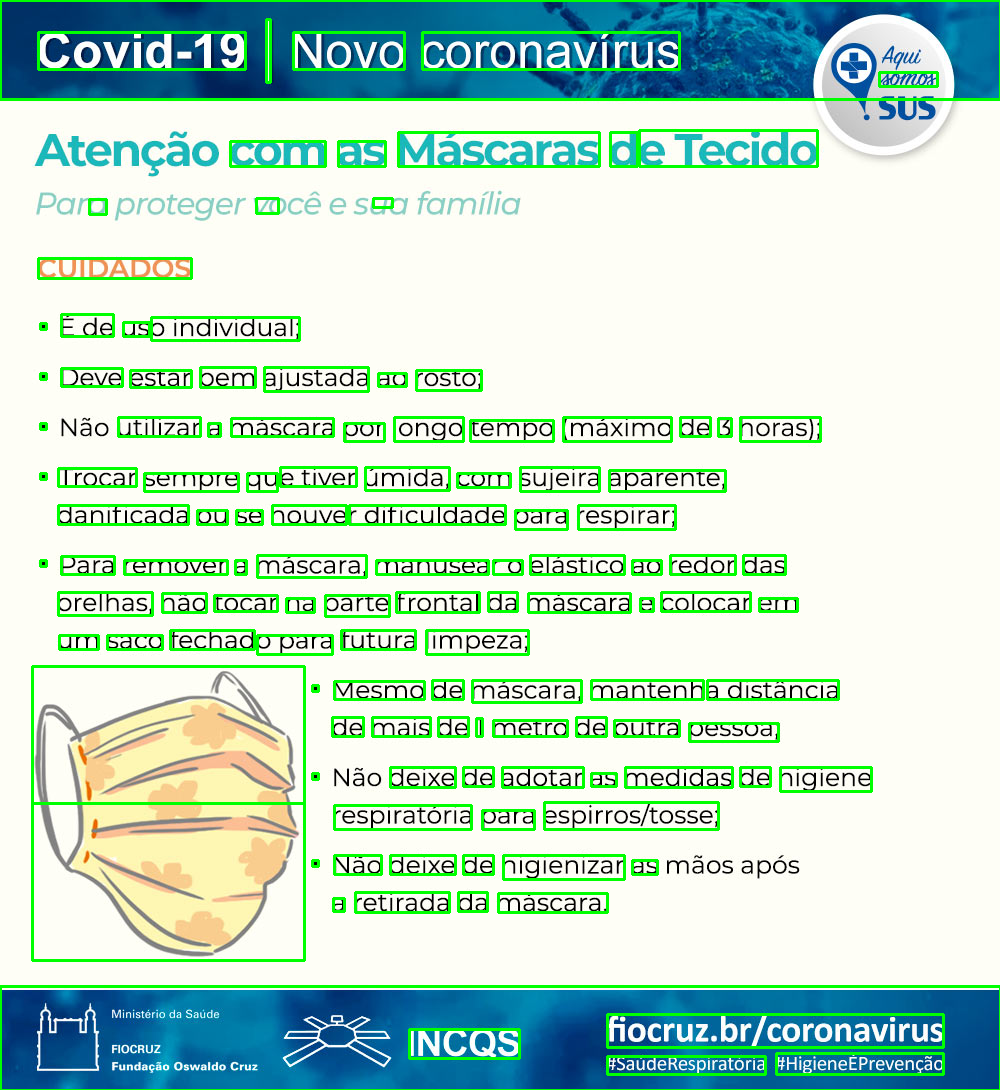

-1

In [24]:
# get OpenCV image
img = cv2.imread(path_to_doc)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

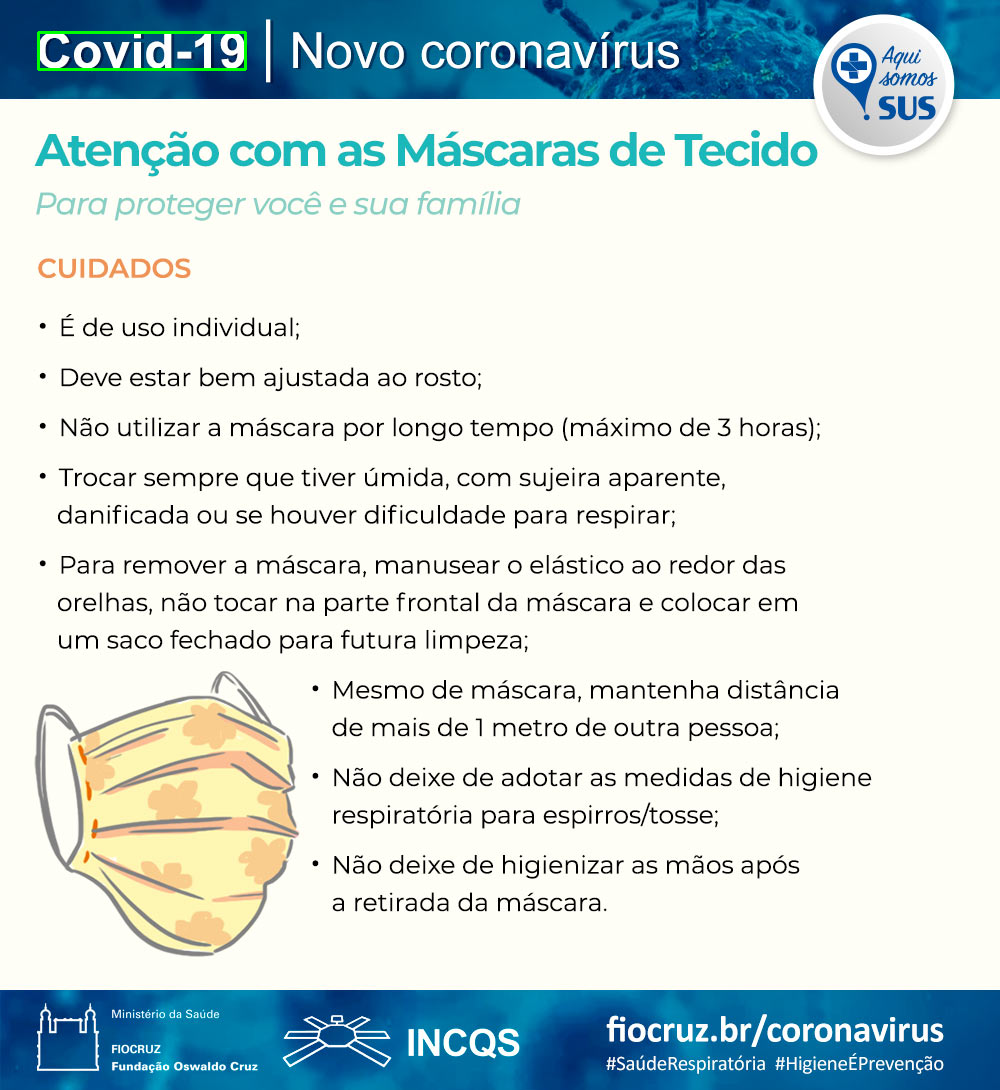

-1

In [25]:
import re

# get OpenCV image
img = cv2.imread(path_to_doc)

d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

# date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'
pattern = '^(Covid-19)$'

n_boxes = len(d['text'])
for i in range(n_boxes):
  if int(d['conf'][i]) > 60:
    if re.match(pattern, d['text'][i]):
      (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
      img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
      
cv2_imshow(img)
cv2.waitKey(0)

### Training Tesseract on custom data

Tesseract 4.00 includes a new neural network-based recognition engine that delivers significantly higher accuracy on document images. Neural networks require significantly more training data and train a lot slower than base Tesseract. For Latin-based languages, the existing model data provided has been trained on about 400000 text lines spanning about 4500 fonts.

In order to successfully run the Tesseract 4.0 LSTM training tutorial, you need to have a working installation of Tesseract 4 and Tesseract 4 Training Tools and also have the training scripts and required trained data files in certain directories. Visit github repo for files and tools.

A guide on how to train on your custom data and create `.traineddata` files can be found [here](https://www.endpoint.com/blog/2018/07/training-tesseract-models-from-scratch/), [here](https://pretius.com/how-to-prepare-training-files-for-tesseract-ocr-and-improve-characters-recognition/) and [here](https://medium.com/@vovaprivalov/tesseract-ocr-tips-custom-dictionary-to-improve-ocr-d2b9cd17850b).

## DocTR

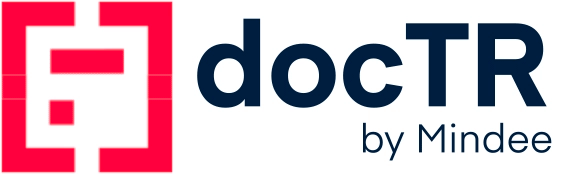

[DocTR](https://github.com/mindee/doctr): Optical Character Recognition with Deep Learning made seamless & accessible to anyone, powered by TensorFlow 2 (PyTorch in beta).

### Configuration

In [26]:
%%capture
!git clone https://github.com/mindee/doctr.git
!pip install -e doctr/.

Before continuing to run the cells of this notebook, **restart its runtime**.

**Note**: se usa o Colab em português, clique no menu "*Ambiente de execução*" > "*Reiniciar ambiente de execução*"

In [1]:
%%capture
!pip3 install tensorflow-addons

### Analysis of a document

In [2]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

  0%|          | 0/94178964 [00:00<?, ?it/s]

  0%|          | 0/58758994 [00:00<?, ?it/s]

#### 1. PDF

Let's analyze an 85-page PDF about COVID-19 in Portuguese language.(Boletim Epidemiológico Covid-19 - Nº 52 from the government of Brazil do 27/02/2021).

In [3]:
# Get the document
# source : https://www.gov.br/saude/pt-br/coronavirus/boletins-epidemiologicos/boletim-epidemiologico-covid-19-no-52.pdf/view
# We only keep the page about Brasil
path_to_data = "/content/drive/MyDrive/Colab Notebooks/PDF_with_DL/data/"
doc_name = "Brasil Boletim Epidemiológico Covid-19 - Nº 52.pdf"
path_to_doc = path_to_data + doc_name

doc = DocumentFile.from_pdf(path_to_doc).as_images()

In [4]:
%%time
# Analyze
result = model(doc)

CPU times: user 1min 35s, sys: 1.35 s, total: 1min 36s
Wall time: 52.5 s


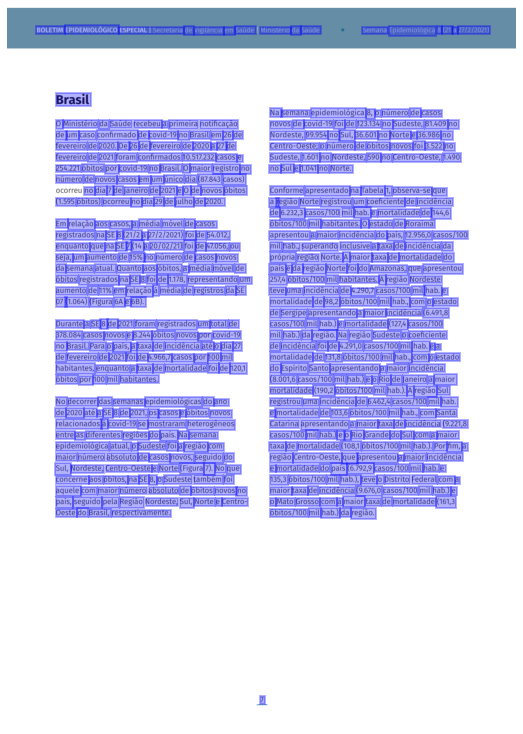

In [5]:
# Show analysed document
result.show(doc)

In [8]:
json_output = result.export()
json_output

{'pages': [{'blocks': [{'artefacts': [],
     'geometry': ((0.056640625, 0.0244140625), (0.94921875, 0.9677734375)),
     'lines': [{'geometry': ((0.056640625, 0.0244140625),
        (0.94921875, 0.9677734375)),
       'words': [{'confidence': 0.6669960618019104,
         'geometry': ((0.056640625, 0.0263671875),
          (0.1123046875, 0.0380859375)),
         'value': 'BOLETIM'},
        {'confidence': 0.9250790476799011,
         'geometry': ((0.1123046875, 0.0244140625), (0.21875, 0.0380859375)),
         'value': 'EPIDEMIOLOGICO'},
        {'confidence': 0.2732674181461334,
         'geometry': ((0.2197265625, 0.02734375), (0.34765625, 0.0380859375)),
         'value': 'ESPECIALISecretaria'},
        {'confidence': 0.8422586917877197,
         'geometry': ((0.447265625, 0.0263671875), (0.48828125, 0.0380859375)),
         'value': 'Saude'},
        {'confidence': 0.5330498218536377,
         'geometry': ((0.4970703125, 0.02734375),
          (0.5576171875, 0.0380859375)),
       

In [9]:
# save
import unidecode
import json
doc_json = unidecode.unidecode(doc_name).lower().replace(' - ','_').replace(' ','_').replace('.pdf','.json')
path_to_doc_json = path_to_data + doc_json
with open(path_to_doc_json, 'w') as json_file:
    json.dump(json_output, json_file)

# load
import json
with open(path_to_doc_json) as json_file:
    json_output = json.load(json_file)

In [11]:
words_list = list()
xmin_list = list()
xmax_list = list()
ymin_list = list()
ymax_list = list()

for word in json_output['pages'][0]['blocks'][0]['lines'][0]['words']:

  # get coordonnates & word
  geometry = word['geometry']
  xmin = geometry[0][0]
  xmax = geometry[1][0]
  ymin = geometry[0][1]
  ymax = geometry[1][1]
  w = word['value']

  # get coordonnates and words lists without head and tail of the page
  if ymin >= 0.12 and ymax <= 0.71:
    xmin_list.append(xmin)
    xmax_list.append(xmax)
    ymin_list.append(ymin)
    ymax_list.append(ymax)
    words_list.append(w)

In [12]:
import pandas as pd
df = pd.DataFrame({'word':words_list,'xmin':xmin_list,'ymin':ymin_list, 'xmax':xmax_list, 'ymax':ymax_list})
df.head(15)

word      xmin      ymin      xmax      ymax
0           Brasil  0.095703  0.120117  0.164062  0.137695
1               Na  0.515625  0.140625  0.539062  0.153320
2           semana  0.538086  0.142578  0.594727  0.153320
3           numero  0.735352  0.141602  0.790039  0.152344
4                0  0.721680  0.143555  0.734375  0.153320
5   epidemiologica  0.596680  0.140625  0.704102  0.154297
6               de  0.791016  0.140625  0.812500  0.153320
7            casos  0.813477  0.142578  0.854492  0.153320
8               8,  0.704102  0.141602  0.721680  0.155273
9       Ministério  0.108398  0.156250  0.178711  0.167969
10           Saude  0.201172  0.156250  0.245117  0.167969
11         recebeu  0.248047  0.157227  0.303711  0.167969
12               0  0.094727  0.156250  0.109375  0.168945
13               a  0.304688  0.158203  0.315430  0.167969
14              da  0.179688  0.156250  0.200195  0.168945

#### 2. Image

In [13]:
# Get the document
# source: https://portal.fiocruz.br/coronavirus/material-para-download
path_to_data = "/content/drive/MyDrive/Colab Notebooks/PDF_with_DL/data/"
doc_name = "atencao_com_as_mascaras_de_tecido_2_0_0.jpg"
path_to_doc = path_to_data + doc_name

doc = DocumentFile.from_images(path_to_doc)

In [14]:
# Analyze
result = model(doc)

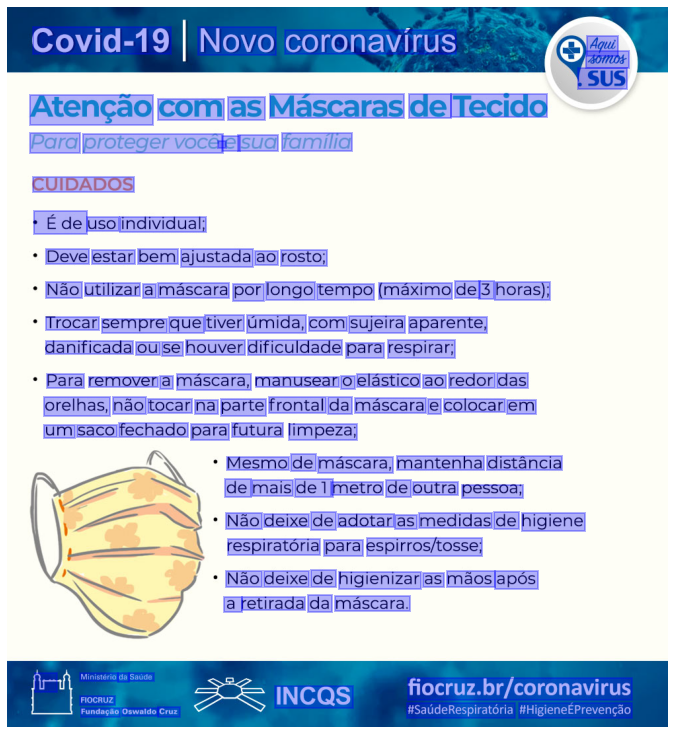

In [15]:
# Show analysed document
result.show(doc)

In [16]:
json_output = result.export()
json_output

{'pages': [{'blocks': [{'artefacts': [],
     'geometry': ((0.0341796875, 0.02734375), (0.9453125, 0.9873046875)),
     'lines': [{'geometry': ((0.0341796875, 0.02734375),
        (0.9453125, 0.9873046875)),
       'words': [{'confidence': 0.9314253926277161,
         'geometry': ((0.0380859375, 0.02734375), (0.248046875, 0.0654296875)),
         'value': 'Covid-19'},
        {'confidence': 0.929085910320282,
         'geometry': ((0.2880859375, 0.02734375), (0.40625, 0.06640625)),
         'value': 'Novo'},
        {'confidence': 0.9703449010848999,
         'geometry': ((0.419921875, 0.03125), (0.6796875, 0.0654296875)),
         'value': 'coronavirus'},
        {'confidence': 0.7228797078132629,
         'geometry': ((0.8779296875, 0.0400390625),
          (0.9248046875, 0.0673828125)),
         'value': 'Aqui'},
        {'confidence': 0.8115224242210388,
         'geometry': ((0.875, 0.0615234375), (0.9404296875, 0.083984375)),
         'value': 'somos'},
        {'confidence': 0.9

In [17]:
words_list = list()
xmin_list = list()
xmax_list = list()
ymin_list = list()
ymax_list = list()

for word in json_output['pages'][0]['blocks'][0]['lines'][0]['words']:

  # get coordonnates & word
  geometry = word['geometry']
  xmin = geometry[0][0]
  xmax = geometry[1][0]
  ymin = geometry[0][1]
  ymax = geometry[1][1]
  w = word['value']

  # get coordonnates and words lists without head and tail of the page
  if ymin >= 0.12 and ymax <= 0.71:
    xmin_list.append(xmin)
    xmax_list.append(xmax)
    ymin_list.append(ymin)
    ymax_list.append(ymax)
    words_list.append(w)

In [18]:
import pandas as pd
df = pd.DataFrame({'word':words_list,'xmin':xmin_list,'ymin':ymin_list, 'xmax':xmax_list, 'ymax':ymax_list})
df.head(15)

word      xmin      ymin      xmax      ymax
0       Mascaras  0.397461  0.120117  0.600586  0.154297
1            com  0.228516  0.126953  0.328125  0.156250
2         Tecido  0.670898  0.120117  0.817383  0.152344
3             as  0.333984  0.125000  0.389648  0.156250
4             de  0.607422  0.120117  0.670898  0.154297
5        Atençao  0.034180  0.122070  0.219727  0.163086
6              I  0.318359  0.185547  0.331055  0.195312
7           Para  0.034180  0.174805  0.110352  0.203125
8        familia  0.415039  0.174805  0.521484  0.199219
9              e  0.324219  0.178711  0.351562  0.200195
10           sua  0.349609  0.177734  0.410156  0.200195
11  protegervoce  0.114258  0.175781  0.326172  0.203125
12      CUIDADOS  0.038086  0.236328  0.191406  0.256836
13           uso  0.120117  0.291992  0.168945  0.311523
14   individual;  0.169922  0.291016  0.299805  0.312500

### Run streamlit app from a Google Colab Notebook
> Created by [Manuel Romero](https://twitter.com/mrm8488)

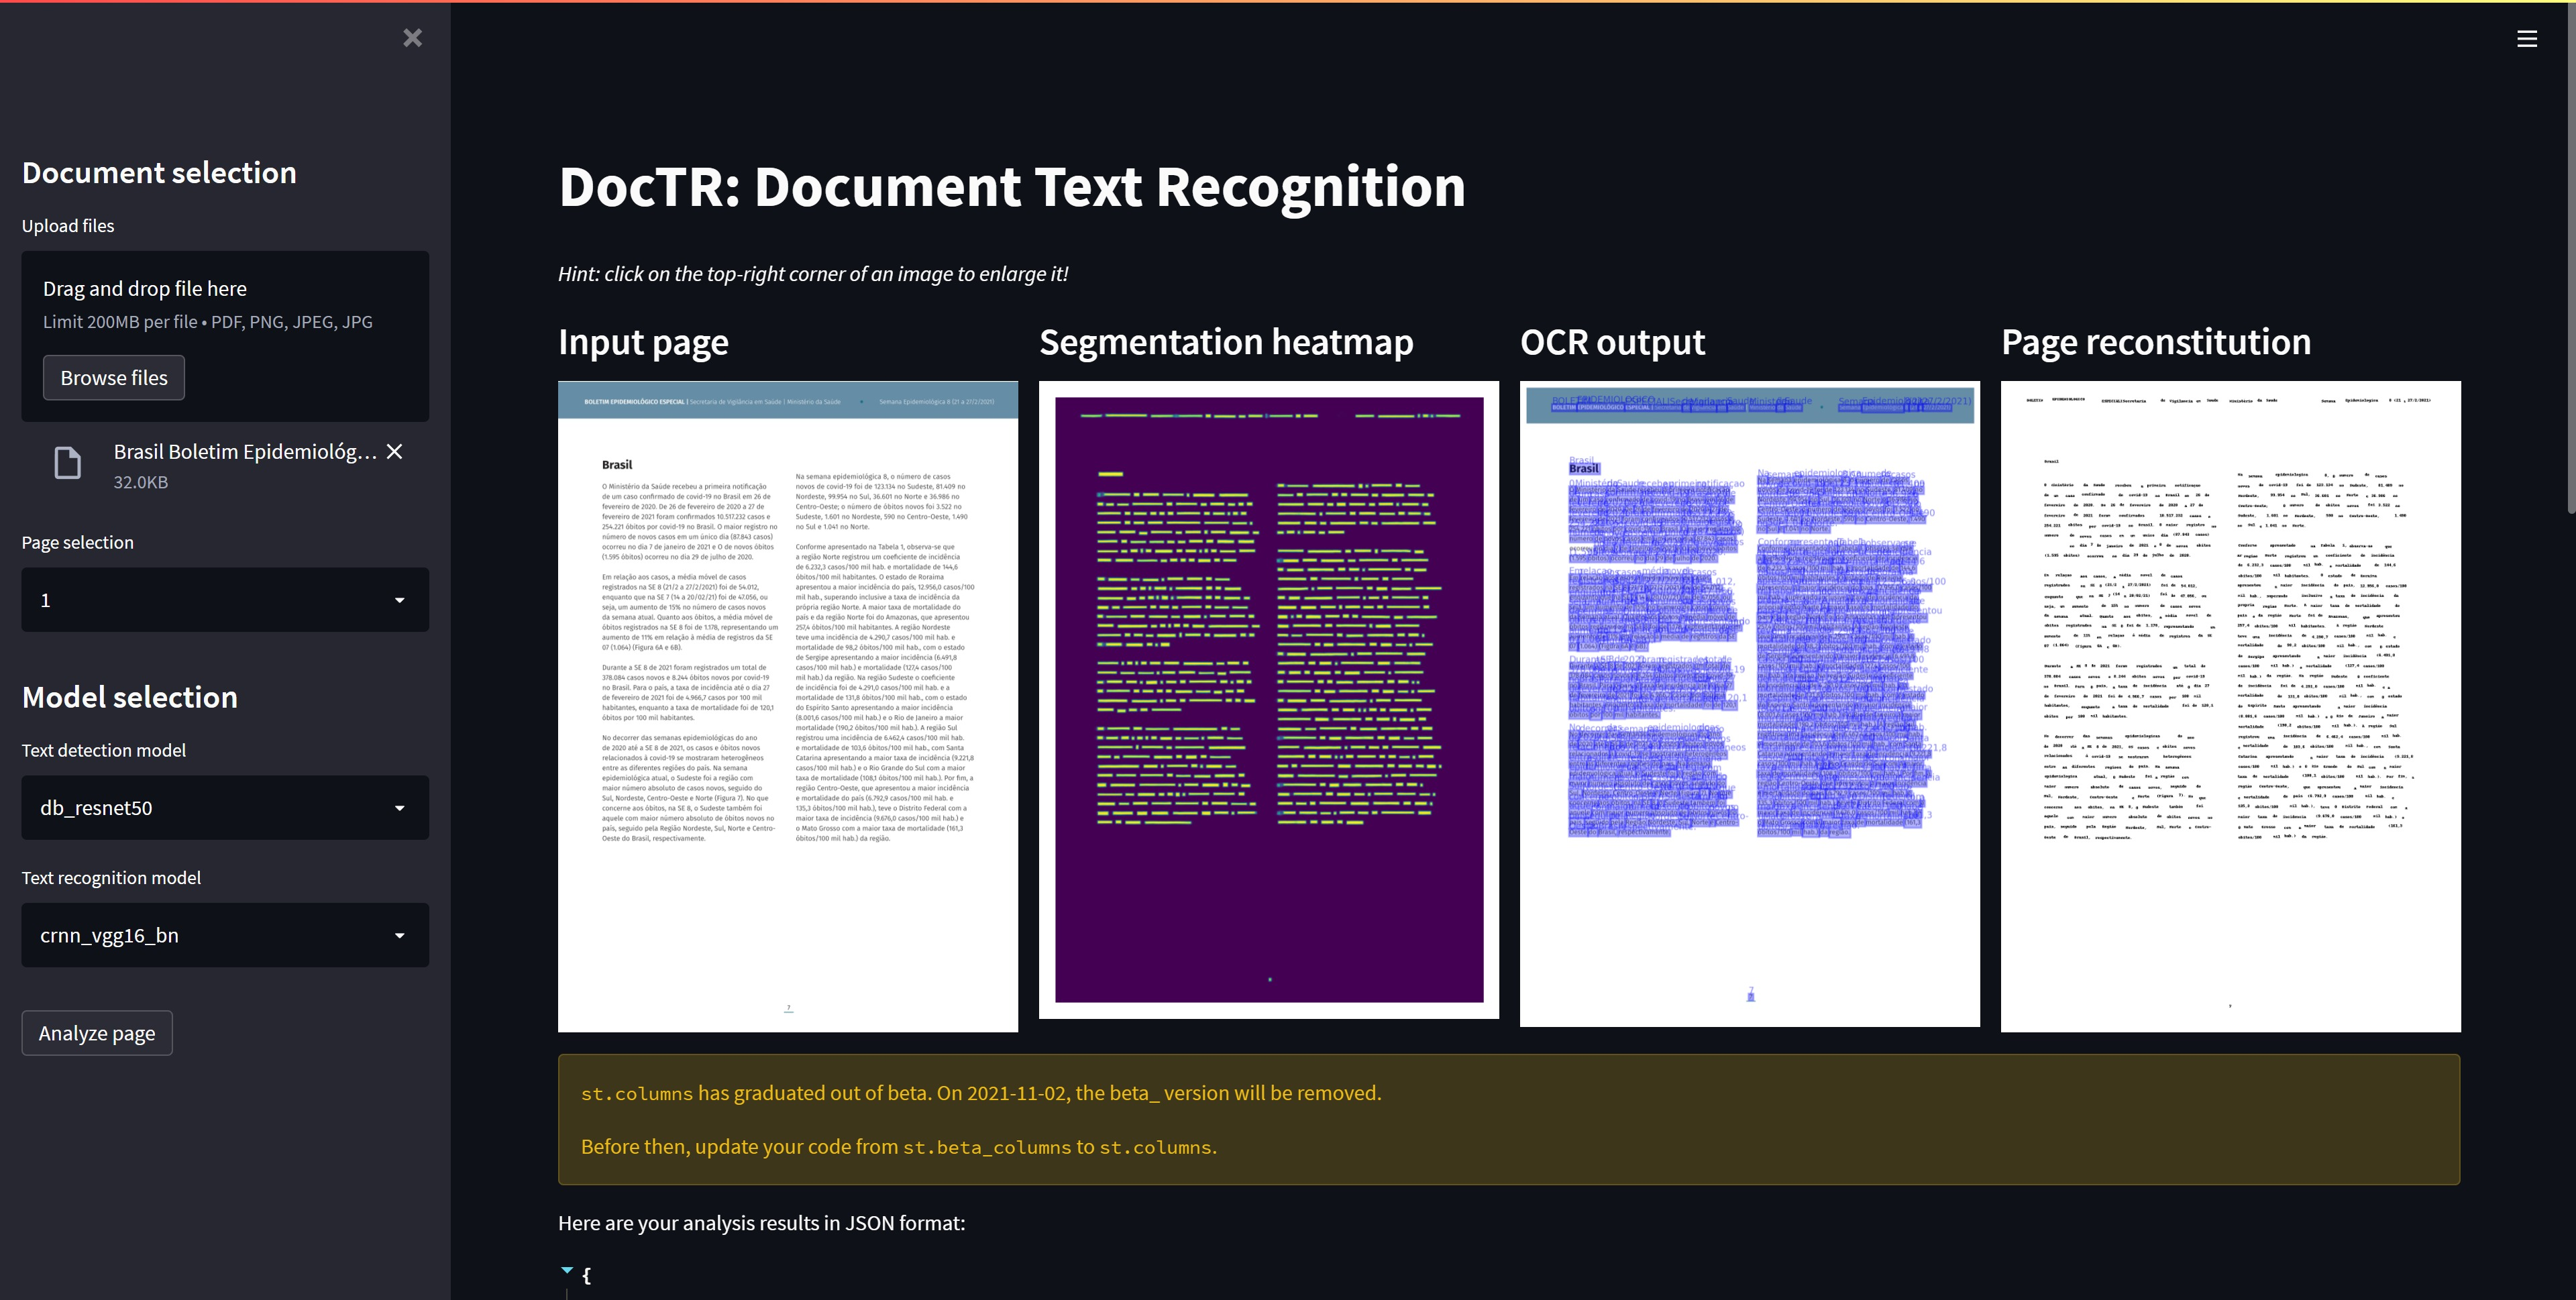

In [1]:
%%capture
!pip install -q streamlit

Reset the execution environment after streamlit installation

In [ ]:
%%capture
# install the DocTR demo
!pip install -r doctr/demo/requirements.txt

#### Install ngrok

In [2]:
%%capture
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [3]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


#### App

In [4]:
get_ipython().system_raw('./ngrok http 8501 &')

In [6]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://97c7-34-135-55-119.ngrok.io


In [8]:
!streamlit run doctr/demo/app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.135.55.119:8501

2021-10-01 13:48:06.497525: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-01 13:48:06.513 PyTorch version 1.9.0+cu102 available.
2021-10-01 13:48:06.514 TensorFlow version 2.6.0 available.
  Stopping...


[![ko-fi](https://www.ko-fi.com/img/githubbutton_sm.svg)](https://ko-fi.com/Y8Y3VYYE)

# END